# **Разгон \ Торможение**

Выполнил: Гаджиев Саид M3215

***Минимальные входные данные:*** дистанция, координаты светофоров, максимальная скорость.

Визуализировать материальную точку в движении по заданной дистан-ции.

***Характер движения материальной точки:*** разгон от светофора, равномерное движение при достижении максимальной скорости, торможение до остановки
при приближении к следующему светофору.

Построить графики зависимости x(t),
V(t), a(t) друг за другом для наглядности сравнения одинаковых точек времени.

In [ ]:
CONST_DISTANCE_LIMIT = 241
CONST_SPEED_LIMIT = 239
CONST_TRAFFIC_SCENARIO = 2

def get_user_input(prompt, default_value):
    try:
        return int(input(prompt))
    except ValueError:
        return default_value

distance = get_user_input("Please enter the distance: ", CONST_DISTANCE_LIMIT)
points = list(map(int, input("Please enter the coordinates of the traffic lights \n movement values relative to the start, separated by spaces: ").split()))
V_max = get_user_input("Please enter the maximum allowed speed: ", CONST_SPEED_LIMIT)
traffic_scenario = get_user_input("Please enter the traffic scenario: ", CONST_TRAFFIC_SCENARIO)

Please enter the distance: 10
Please enter the coordinates of the traffic lights 
 movement values relative to the start, separated by spaces: 2 5 10
Please enter the maximum allowed speed: 8
Please enter the traffic scenario: 2


# ***Модель:***

Между каждыми координатами светофоров на участке произвольно выбираются возможные случаи движения (сценарии):

1. Материальная точка ускоряется и затем сразу замедляется.
В таком случае на участке произвольно выбираются значение координаты, в которой скорость будет максимальна и само значение скорости из диапазона допустимых значений. Затем для этих значений рассчитывается необходимое ускорение.

2. Материальная точка ускоряется, достигает максимальную скорость, движется равномерно, затем замедляется. Аналогично предыдущему случаю, но выбираются уже две координаты, тогда как скорость известна и равна максимальной.

Таким образом, каждый участок, на котором характер движения меняется рассматривается отдельно и независимо от остальных. Для каждого такого независимого участка хранится набор параметров - начальная и конечная скорость, ускорение, начальная и конечная координаты и начальное время относительно начала движения от самого первого светофора.

Функции ниже выражают общие уравнения движения, в которые подставляются эти наборы параметров:

In [ ]:
def func_x_t(V_0, V_end, a, x_0, t):
    return x_0 + V_0*t + a*(t*t)/2

def func_v_t(V_0, V_end, a, x_0, t):
    return V_0 + a*t

def func_a_t(V_0, V_end, a, x_0, t):
    return a

def func_a(V_0, V_end, x_0, x_end):
    return (V_end * V_end - V_0 * V_0) / (2 * (x_end - x_0))

def func_x_for_x(t_0, V_0, V_end, a, x_0, x_end):
    if a == 0:
        return t_0 + (x_end - x_0) / V_0
    return t_0 + (V_end - V_0) / a

In [ ]:
import random

output_parameters = []
x_points = []
t_for_x_points = []
t_for_x_points.append(0)
a_for_max = []

for i in range(len(points) - 1):

    if traffic_scenario == 1:
        x_points.append(points[i])
        x = random.randint(points[i] + 1, points[i + 1] - 1)
        x_points.append(x)
        V_end = random.randint(1, V_max)
        a_plus = func_a(0, V_end, points[i], x)
        t = func_x_for_x(t_for_x_points[len(t_for_x_points) - 1], 0, V_end, a_plus, points[i], x)
        t_for_x_points.append(t)
        output_parameters.append((0, V_end, a_plus, points[i]))

        a_minus = func_a(V_end, 0, x, points[i + 1])
        output_parameters.append((V_end, 0, a_minus, x))
        t = func_x_for_x(t_for_x_points[len(t_for_x_points) - 1], V_end, 0, a_minus, x,  points[i + 1])
        t_for_x_points.append(t)

        a_for_max.append(a_plus)
        a_for_max.append(a_minus)

    else:
        x_points.append(points[i])
        x = random.randint(points[i] + 1, points[i + 1] - 1)
        x_2 = random.randint(x, points[i + 1] - 1)
        x_points.append(x)
        x_points.append(x_2)
        a_plus = func_a(0, V_max, points[i], x)
        t = func_x_for_x(t_for_x_points[len(t_for_x_points) - 1], 0, V_max, a_plus, points[i], x)
        t_for_x_points.append(t)
        output_parameters.append((0, V_max, a_plus, points[i]))

        output_parameters.append((V_max, V_max, 0, x))
        t = func_x_for_x(t_for_x_points[len(t_for_x_points) - 1], V_max, V_max, 0, x, x_2)
        t_for_x_points.append(t)

        a_minus = func_a(V_max, 0, x_2, points[i + 1])
        output_parameters.append((V_max, 0, a_minus, x_2))
        t = func_x_for_x(t_for_x_points[len(t_for_x_points) - 1], V_max, 0, a_minus, x_2, points[i + 1])
        t_for_x_points.append(t)

        a_for_max.append(a_plus)
        a_for_max.append(a_minus)

Во время анимирования движения значения времени бинпоиском сопоставляются с соответствующим участком дистанции, и для него вызываются функции с уравнениями с нужными параметрами.

In [ ]:
from bisect import bisect_left

def function_x(t):
    index = bisect_left(t_for_x_points, t) - 1
    return func_x_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])

def function_v(t):
    index = bisect_left(t_for_x_points, t) - 1
    return func_v_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])

def function_a(t):
    index = bisect_left(t_for_x_points, t) - 1
    return func_a_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])

Создание статических объектов, которые не изменятся во время итераций.

1. *Светофоры - жёлтые плюсики.*
2. *Движущееся тело - синий треугольник.*
3. *Начало дистанции - красный квадрат.*
4. *Конец дистанции - зелёный квадрат.*
5. *Шаблоны для графиков x(t), V(t), a(t).*

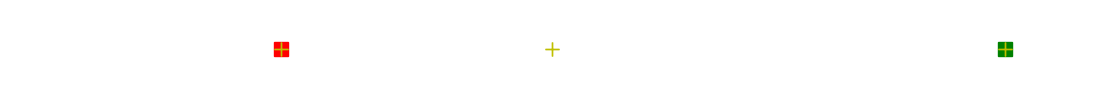

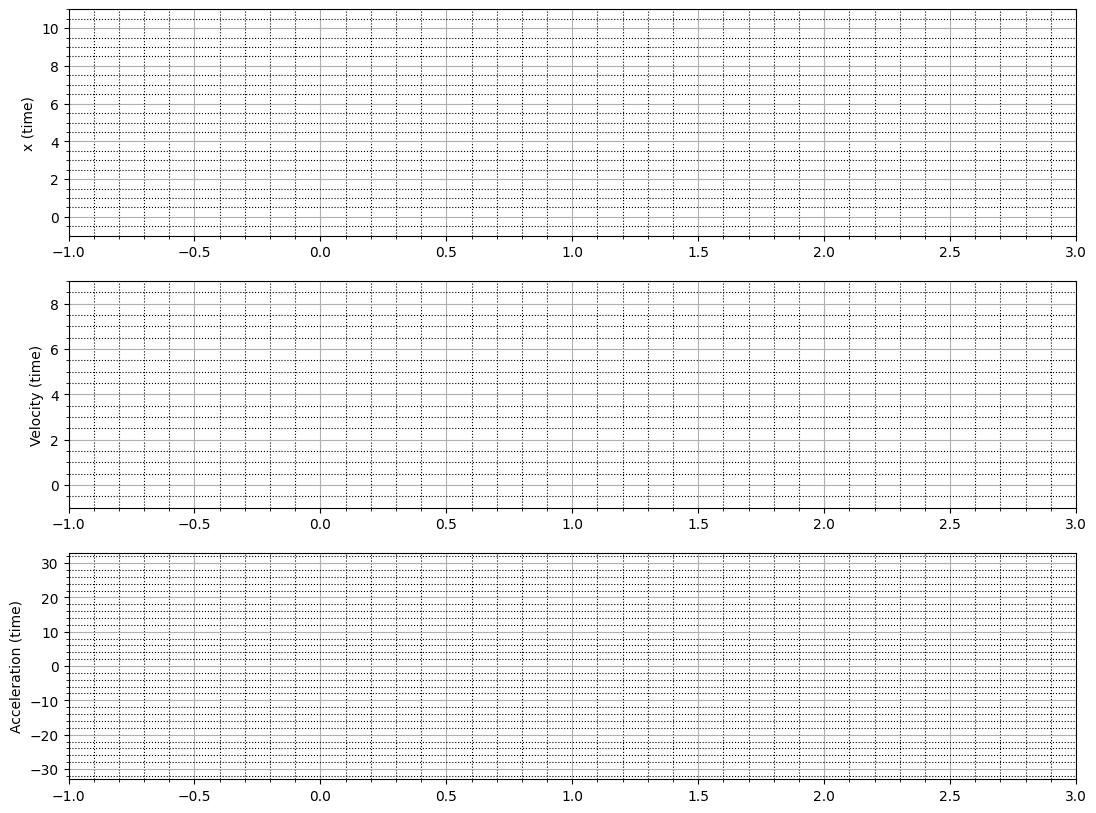

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

figure_model = plt.figure(figsize=(14,1))
ax_model = plt.subplot(1,1,1)
plt.axis('off')
figure = plt.figure(figsize=(13,10))
axs = figure.subplots(3,1)

ax_model.set_xlim((-1, distance + 1))
ax_model.set_ylim((-1, 1))
ax_model.set_ylabel(' ')

axs[0].set_xlim(( -1, t_for_x_points[len(t_for_x_points) - 1] + 1))
axs[0].set_ylim(( -1, distance + 1))
axs[0].set_ylabel('x (time)')
axs[0].minorticks_on()
axs[0].grid(True, which='both')
axs[0].grid(which='minor', color='black', linestyle=':')

axs[1].set_xlim((-1,t_for_x_points[len(t_for_x_points) - 1] + 1))
axs[1].set_ylim((-1, V_max + 1))
axs[1].set_ylabel('Velocity (time)')
axs[1].minorticks_on()
axs[1].grid(True, which='both')
axs[1].grid(which='minor', color='black', linestyle=':')

axs[2].set_xlim((-1,t_for_x_points[len(t_for_x_points) - 1] + 1))
axs[2].set_ylim((min(a_for_max) - 1,max(a_for_max) + 1))
axs[2].set_ylabel('Acceleration (time)')
axs[2].minorticks_on()
axs[2].grid(True, which='both')
axs[2].grid(which='minor', color='black', linestyle=':')

line_x, = axs[0].plot([], [], 'b', lw=3)
line_v, = axs[1].plot([], [], 'b', lw=3)
line_a, = axs[2].plot([], [], 'b', lw=3)
pt_1, = ax_model.plot([], [], 'b>', ms=20)
line_3, = ax_model.plot([], [], lw=3)

start, = ax_model.plot(points[0], 0, 'rs', ms=10)
end, = ax_model.plot(points[len(points) - 1], 0, 'gs', ms=10)

for i in points:
    start, = ax_model.plot(i, 0, 'y+', ms=10)
    end, = ax_model.plot(i, 0, 'y+', ms=10)

In [ ]:
def init():
    line_3.set_data([], [])
    return line_3,

x_data = []

def animate(i):
    t = 0.01 * i
    x = function_x(t)
    x_data.append(x)
    line_3.set_data(x_data[0:1], 0)
    pt_1.set_data(x, 0)
    return pt_1,

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

animation = FuncAnimation(figure_model, animate, init_func=init, frames=int(100*(t_for_x_points[len(t_for_x_points) - 1])), interval=20, blit=True)
HTML(animation.to_html5_video())

<ipython-input-19-c57d9022c3f7>:11: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line_3.set_data(x_data[0:1], 0)
<ipython-input-19-c57d9022c3f7>:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt_1.set_data(x, 0)


In [ ]:
def init():
    line_x.set_data([], [])
    line_v.set_data([], [])
    line_a.set_data([], [])
    return line_x, line_v, line_a

x_data = []
v_data = []
a_data = []
t_data = []

def animate(i):
    t = 0.01 * i
    t_data.append(t)
    x = function_x(t)
    x_data.append(x)
    v = function_v(t)
    v_data.append(v)
    a = function_a(t)
    a_data.append(a)
    line_x.set_data(t_data, x_data)
    line_v.set_data(t_data, v_data)
    line_a.set_data(t_data, a_data)
    return line_x, line_v, line_a

In [ ]:
animation = FuncAnimation(figure, animate, init_func=init, frames=int(100*(t_for_x_points[len(t_for_x_points) - 1])), interval=20, blit=True)

HTML(animation.to_html5_video())